  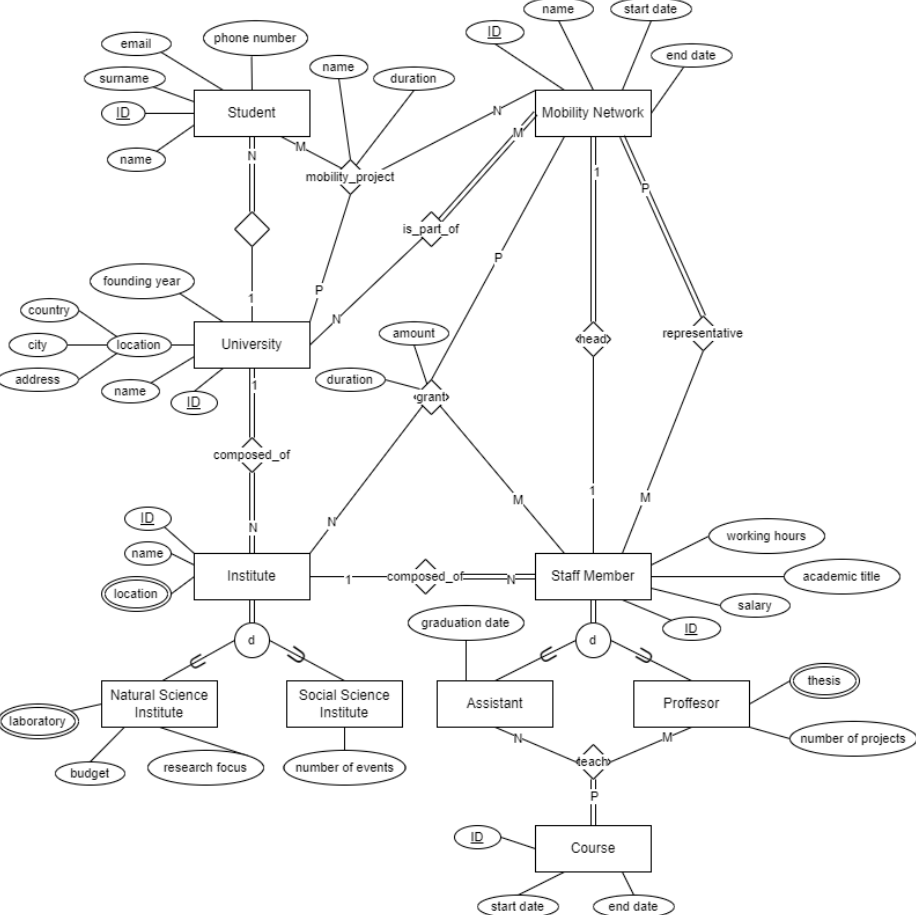

На сликата подолу е прикажан дел од ЕР дијаграм за организација на универзитети и мобилност на студенти и вработени.

Релационата база е дефинирана преку следните релации: 

**University(id, name, founding\_year, country, city, address)  
Institute(id, name, university\_id\*)  
Institute\_Location(institute\_id\*, location)  
Natural\_Science\_Institute(institute\_id\*, budget, research\_focus)  
NSI\_Laboratory(institute\_id\*, laboratory)  
Social\_Science\_Institute(institute\_id\*, number\_of\_events)  
Staff\_Member(id, academic\_title, salary, working\_hours, institute\_id\*)  
Assistant(sm\_id\*, graduation\_date)  
Professor(sm\_id\*, number\_of\_projects)  
Professor\_Thesis(sm\_id\*, thesis)  
Course(id, start\_date, end\_date)  
Teach(professor\_id\*, assistant\_id\*, course\_id\*)  
Student(id, name, surname, email, phone\_number, university\_id\*)  
Mobility\_Network(id, name, start\_date, end\_date)  
Representative(staff\_id\*, network\_id\*)  
Head(staff\_id\*, network\_id\*)  
Grant(staff\_id\*, network\_id\*, institute\_id\*, amount, duration)  
Part\_of(university\_id\*, network\_id\*)  
Mobility\_Project(network\_id\*, student\_id\*, university\_id\*, name, duration)**

1.Да се напише/ат соодветниот/те тригер/и за одржување на референцијалниот интегритет на релацијата „Grant“ доколку треба да се исполнети следните барања:

- Не сакаме да водиме евиденција за доделени грантови на мобилни мрежи кои се избришани од системот.
- Сакаме да водиме евиденција за доделување на грант од членови на кадарот кои се избришани од системот како доделен грант на непознат член од кадарот (вредност -1).

In [ ]:
create trigger update_grant

after delete on Mobility_Network

for each row

begin

    delete from Grant

    where network_id = old.id;

end;

create trigger update_grant_given

after delete on Staff_Member

for each row

begin

    update Grant

    set staff_id = -1

    where staff_id = old.id; --and institute_id = old.institute_id and network_id = old.network_id;

end;

<span style="color: var(--vscode-foreground);">2.За секој природно - научен институт се чува изведен атрибут „</span>**num\_labs**<span style="color: var(--vscode-foreground);">“ кој го означува вкупниот број на лаборатории на дадениот институт.</span>

Да се напише/ат соодветниот/те тригер/и за одржување на конзистентноста на атрибутот „**num\_labs**“ при додавање и отстранување на записи во табелата за лаборатории.

In [ ]:
create trigger addLab

after insert on NSI_Laboratory

begin

    update Natural_Science_Institute

    set num_labs = num_labs + 1

    where institute_id = new.institute_id;

end;

create trigger deleteLab

after delete on NSI_Laboratory

begin

    update Natural_Science_Institute

    set num_labs = num_labs - 1

    where institute_id = old.institute_id;

end;

<span style="color: var(--vscode-foreground);">3.</span><span style="color: var(--vscode-foreground);">За секој професор се чува изведен атрибут „</span>**workload**<span style="color: var(--vscode-foreground);">“ кој го означува ангажманот на професорот. Степенот на оптоварување има вредност „high“ ако професорот предава на повеќе од 3 различни курсеви, вредност „normal“ ако предава помеѓу 1 и 3 различни курсеви, и вредност „none“ доколку не предава ниту еден курс.</span>  

Да се напише/ат соодветниот/те тригер/и за одржување на конзистентноста на атрибутот „**workload**“ при додавање на нов кадар на курс (Teach).

In [ ]:
create trigger addProf

after insert on Teach

for each row

begin

    update Professor

    set workload = "high"

    where sm_id = new.professor_id 

    and (

        select count(distinct course_id)

        from Teach t

        where t.professor_id = new.professor_id

    ) > 3;

    update Professor

    set workload = "normal"

    where sm_id = new.professor_id 

    and (

        select count(distinct course_id)

        from Teach t

        where t.professor_id = new.professor_id

    ) between 1 and 3;

    update Professor

    set workload = "none"

    where sm_id = new.professor_id 

    and(

        select count(distinct course_id)

        from Teach t

        where t.professor_id = new.professor_id

    ) < 1;

end;